# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/insurance.csv")

In [4]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.

### Do the same for smoker, region
df.loc[df["smoker"] == "yes","smoker"] = 1.
df.loc[df["smoker"] == "no","smoker"] = 0.

df.loc[df["region"] == "southwest","southwest"] = 1.
df.loc[df["region"] != "southwest","southwest"] = 0.

df.loc[df["region"] == "northwest","northwest"] = 1.
df.loc[df["region"] != "northwest","northwest"] = 0.

df.loc[df["region"] == "southeast","southeast"] = 1.
df.loc[df["region"] != "southeast","southeast"] = 0.

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges,southwest,northwest,southeast
0,19,1.0,27.900,0,1.0,southwest,16884.92400,1.0,0.0,0.0
1,18,0.0,33.770,1,0.0,southeast,1725.55230,0.0,0.0,1.0
2,28,0.0,33.000,3,0.0,southeast,4449.46200,0.0,0.0,1.0
3,33,0.0,22.705,0,0.0,northwest,21984.47061,0.0,1.0,0.0
4,32,0.0,28.880,0,0.0,northwest,3866.85520,0.0,1.0,0.0


# 2.) Split the data into 80/20, in/out sample

In [6]:
import numpy as np

In [7]:
data = np.array(df[['age','sex','bmi','children', 'smoker', 'southwest', 'northwest', 'southeast']])
target = np.array(df.iloc[:, -4])

In [8]:
cut = int((len(data) * .8) // 1)

In [9]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [10]:
from sklearn import preprocessing

In [11]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [12]:
# Import LassoCV
from sklearn.linear_model import LassoCV
modCV = LassoCV().fit(in_data_scale, in_target)

In [13]:
a = modCV.alpha_

In [14]:
print("lambda: ", a)

lambda:  115.9799859390741


# 5.) Run a lambda regression with that Lambda

In [15]:
from sklearn.linear_model import Lasso

In [16]:
modl = Lasso(alpha = a).fit(in_data_scale, in_target)

# 6.) Visualize the coefficients 

In [17]:
coeff1 = modl.coef_

In [18]:
print(coeff1)

[3580.35805206    0.         1897.42890992  415.06890389 9345.10115447
 -238.7634887    -0.         -158.68185954]


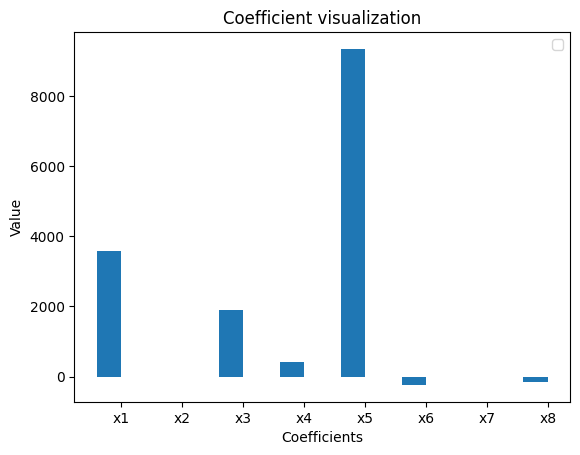

In [19]:
X = ['x1','x2','x3','x4','x5','x6','x7','x8']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, coeff1, 0.4, label = None)
  
plt.xticks(X_axis, X)
plt.xlabel("Coefficients")
plt.ylabel("Value")
plt.title("Coefficient visualization")
plt.legend()
plt.show()

# 7.) Interpret the coefficients

As shown above, X1, X3, X5 are positve, so there exists positive correlations between age(x1), bmi(x3), smoker(x5) and charges (target variable). X2 and X7 are 0, so there is no correlation between these variables (sex, northwest) and charges (target variable). X4 is slightly positive; X6 and X8 are slightly negative so these features (children, southwest, southeast) are not important. 

# 8.) Compare in and out of sample MSE’s

In [20]:
from sklearn.metrics import mean_squared_error as mse

In [21]:
in_sample_pred = modl.predict(in_data_scale)
out_sample_pred = modl.predict(out_data_scale)

In [22]:
in_sample_mse = mse(in_sample_pred, in_target)
out_sample_mse = mse(out_sample_pred, out_target)

In [23]:
print("In-sample MSE: ", in_sample_mse)
print("Out of sample MSE: ", out_sample_mse)

In-sample MSE:  36521811.462161295
Out of sample MSE:  37152269.57019608


As shown above, the in-sample MSE is 36521811.462161295 and the out of sample MSE is 37152269.57019608. The out of sample MSE is slightly larger than the in-sample MSE, which indicates our model is robust.